In [16]:
# Import Necessary Libraries
# These are the libraries we need to work with data and the model
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from datasets import load_dataset
from transformers import T5Tokenizer, T5ForConditionalGeneration

# To ignore warnings for a cleaner output
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Load the Dataset
# Load the CNN/Daily Mail dataset from Hugging Face
dataset = load_dataset("cnn_dailymail", "3.0.0")

# Print the dataset structure to see what it looks like
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})


In [18]:
# Explore the Dataset
# Print a few examples from the dataset to understand its structure
print(dataset['train'][0])
print(dataset['validation'][0])
print(dataset['test'][0])

# Convert the dataset to pandas DataFrames for easier manipulation
df_train = pd.DataFrame(dataset['train'])
df_valid = pd.DataFrame(dataset['validation'])
df_test = pd.DataFrame(dataset['test'])

# Print basic statistics about the data
print(df_train.describe())
print(df_valid.describe())
print(df_test.describe())

{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office char

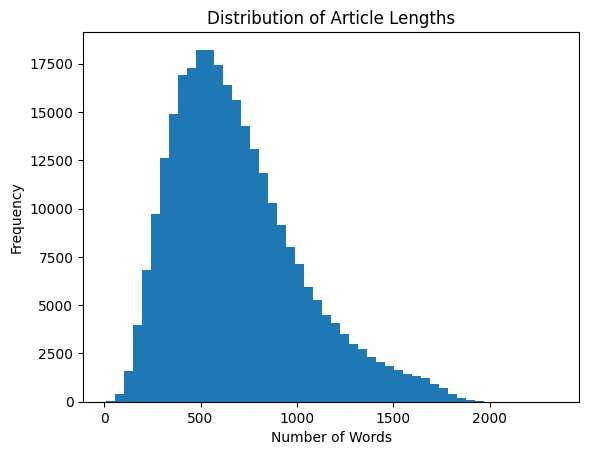

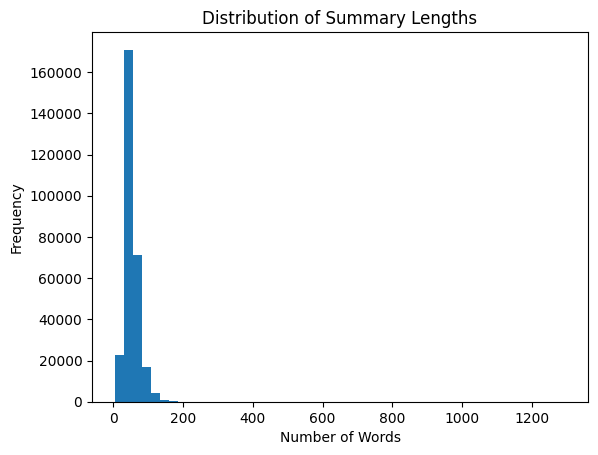

In [19]:
# Visualize Data
# Plot the distribution of article lengths
# This helps us understand how long the articles are
article_lengths = df_train['article'].apply(lambda x: len(x.split()))
plt.hist(article_lengths, bins=50)
plt.title('Distribution of Article Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of summary lengths
# This helps us understand how long the summaries are
summary_lengths = df_train['highlights'].apply(lambda x: len(x.split()))
plt.hist(summary_lengths, bins=50)
plt.title('Distribution of Summary Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [20]:
from transformers import T5Tokenizer

# Initialize tokenizer
tokenizer = T5Tokenizer.from_pretrained('t5-small')

# Tokenize a sample article
sample_article = df_train['article'][0]
tokenized_article = tokenizer.encode(sample_article, max_length=512, truncation=True)
print(tokenized_article)

# Decode the tokenized article
decoded_article = tokenizer.decode(tokenized_article)
print(decoded_article)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[301, 24796, 4170, 6, 2789, 41, 18844, 61, 1636, 8929, 16023, 2213, 4173, 6324, 12591, 15, 11391, 592, 12, 3, 9, 2196, 3996, 1755, 770, 8785, 591, 11039, 770, 61, 13462, 38, 3, 88, 5050, 507, 30, 2089, 6, 68, 3, 88, 10419, 7, 8, 540, 751, 31, 17, 4061, 3, 9, 10783, 30, 376, 5, 4173, 6324, 12591, 15, 38, 8929, 16023, 16, 96, 15537, 651, 16023, 11, 8, 5197, 13, 8, 12308, 121, 304, 8, 19142, 13, 29517, 6710, 343, 7, 300, 8, 296, 6, 8, 1021, 7556, 845, 3, 88, 65, 150, 1390, 12, 9030, 17, 449, 112, 1723, 550, 30, 1006, 2948, 6, 3281, 11, 17086, 2251, 5, 96, 196, 278, 31, 17, 515, 12, 36, 80, 13, 273, 151, 113, 6, 38, 1116, 38, 79, 919, 14985, 8247, 805, 1452, 3, 9, 3805, 2100, 443, 1232, 42, 424, 1126, 976, 3, 88, 1219, 46, 3746, 2772, 49, 2283, 48, 847, 5, 96, 196, 278, 31, 17, 317, 27, 31, 195, 36, 1989, 28887, 5, 96, 634, 378, 27, 114, 2611, 33, 378, 24, 583, 81, 335, 7051, 1636, 1335, 11, 3190, 7, 11, 5677, 7, 535, 486, 14985, 6324, 12591, 15, 56, 36, 3, 179, 12, 24068, 16, 3, 9, 2653, 

In [21]:
# Initialize Tokenizer and Model
# Initialize the T5 tokenizer and model
tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [22]:
# Tokenize a Sample Article
# Tokenize a sample article to see what the tokenized output looks like
sample_article = df_train['article'][0]
tokenized_article = tokenizer.encode(sample_article, max_length=512, truncation=True)
print(tokenized_article)

[301, 24796, 4170, 6, 2789, 41, 18844, 61, 1636, 8929, 16023, 2213, 4173, 6324, 12591, 15, 11391, 592, 12, 3, 9, 2196, 3996, 1755, 770, 8785, 591, 11039, 770, 61, 13462, 38, 3, 88, 5050, 507, 30, 2089, 6, 68, 3, 88, 10419, 7, 8, 540, 751, 31, 17, 4061, 3, 9, 10783, 30, 376, 5, 4173, 6324, 12591, 15, 38, 8929, 16023, 16, 96, 15537, 651, 16023, 11, 8, 5197, 13, 8, 12308, 121, 304, 8, 19142, 13, 29517, 6710, 343, 7, 300, 8, 296, 6, 8, 1021, 7556, 845, 3, 88, 65, 150, 1390, 12, 9030, 17, 449, 112, 1723, 550, 30, 1006, 2948, 6, 3281, 11, 17086, 2251, 5, 96, 196, 278, 31, 17, 515, 12, 36, 80, 13, 273, 151, 113, 6, 38, 1116, 38, 79, 919, 14985, 8247, 805, 1452, 3, 9, 3805, 2100, 443, 1232, 42, 424, 1126, 976, 3, 88, 1219, 46, 3746, 2772, 49, 2283, 48, 847, 5, 96, 196, 278, 31, 17, 317, 27, 31, 195, 36, 1989, 28887, 5, 96, 634, 378, 27, 114, 2611, 33, 378, 24, 583, 81, 335, 7051, 1636, 1335, 11, 3190, 7, 11, 5677, 7, 535, 486, 14985, 6324, 12591, 15, 56, 36, 3, 179, 12, 24068, 16, 3, 9, 2653, 

In [23]:
# Decode the Tokenized Article
# Decode the tokenized article back to text to verify the tokenization
decoded_article = tokenizer.decode(tokenized_article)
print(decoded_article)

LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don't think I'll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office chart. Details of how

In [24]:
# Input Your Own Article
# Input your own article for summarization
custom_article = """
The Transformative Impact of AI on the World and Its Dual Effect on the Job Market
Artificial Intelligence (AI) is undeniably reshaping the world as we know it, permeating various sectors and influencing our daily lives. From healthcare and finance to transportation and education, AI's capabilities are driving significant advancements and efficiencies. However, this technological revolution brings a complex and nuanced impact on the job market, posing both opportunities and challenges.

AI's Global Influence
AI technologies, particularly machine learning and deep learning, have enabled unprecedented progress across multiple domains:

Healthcare: AI is revolutionizing healthcare with applications in diagnostics, personalized medicine, and predictive analytics. AI-powered tools can analyze vast amounts of medical data, identifying patterns and predicting patient outcomes more accurately than traditional methods.

Finance: In finance, AI algorithms are used for fraud detection, risk assessment, and automated trading. These systems can process and analyze large datasets in real time, making financial operations more secure and efficient.

Transportation: AI is the backbone of autonomous vehicles, improving traffic management, and optimizing logistics. Predictive maintenance and smart routing algorithms are enhancing the efficiency and safety of transportation networks.

Education: AI-driven educational tools provide personalized learning experiences, adaptive testing, and virtual tutors. These innovations help cater to individual learning paces and styles, improving educational outcomes.

The Dual Impact on the Job Market
The introduction and integration of AI into various industries bring about a significant transformation in the job market. This impact can be categorized into two broad themes: job displacement and job creation.

Job Displacement
AI's ability to automate repetitive and routine tasks poses a threat to certain job categories. Roles that involve data entry, basic analysis, and manual labor are particularly vulnerable. For instance:

Manufacturing: AI-powered robots and automation systems can perform repetitive tasks more efficiently, reducing the need for human labor on assembly lines.
Customer Service: Chatbots and virtual assistants are increasingly handling customer inquiries and support, which may reduce the demand for human customer service representatives.
Retail: Automated checkout systems and inventory management tools are replacing some traditional retail jobs.
Job Creation and Transformation
Conversely, AI also creates new job opportunities and transforms existing roles. The demand for AI specialists, data scientists, and cybersecurity experts is on the rise. Additionally, AI can augment human capabilities, leading to the creation of hybrid roles that combine human skills with AI-enhanced tools. Examples include:

AI Development and Maintenance: Jobs related to the development, deployment, and maintenance of AI systems are proliferating. These roles require expertise in programming, data analysis, and machine learning.
Healthcare Professionals: AI tools can assist doctors and nurses in diagnosis and treatment planning, allowing healthcare professionals to focus on more complex and human-centric aspects of patient care.
Creative Industries: AI can assist in content creation, music composition, and art, enabling artists and designers to explore new creative horizons while AI handles routine aspects of the creative process.
Balancing the Benefits and Challenges
To maximize the benefits of AI while mitigating its negative impacts on the job market, several strategies can be adopted:

Reskilling and Upskilling: Governments and organizations should invest in reskilling and upskilling programs to equip workers with the necessary skills to thrive in an AI-driven economy. This includes training in AI technologies, data analysis, and other emerging fields.

Regulatory Frameworks: Implementing policies and regulations that ensure the ethical use of AI is crucial. This includes addressing issues related to data privacy, algorithmic bias, and the impact of automation on employment.

Human-AI Collaboration: Encouraging a collaborative approach where humans and AI work together can enhance productivity and innovation. Emphasizing the complementary strengths of humans and machines can lead to more effective and satisfying work environments.

Social Safety Nets: Strengthening social safety nets, such as unemployment benefits and job transition programs, can support workers who are displaced by AI-driven automation, helping them transition to new roles or industries.

Conclusion
AI's transformative impact on the world is undeniable, bringing about both opportunities and challenges. While AI has the potential to displace certain jobs, it also creates new roles and transforms existing ones. By adopting a proactive and balanced approach, society can harness the power of AI to drive progress while ensuring that the benefits are broadly shared. Investing in education, reskilling, and ethical AI practices will be key to navigating the future of work in an AI-driven world.
"""

# Tokenize the custom article
inputs = tokenizer(custom_article, return_tensors="pt", max_length=512, truncation=True)

# Generate summary
summary_ids = model.generate(inputs.input_ids, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Print the summary
print("Summary:")
print(summary)


Summary:
and job creation. Job Displacement AI's ability to automate repetitive and routine tasks poses a threat to certain job categories. Job Displacement AI's ability to automate repetitive and routine tasks poses a threat to certain job categories. Manufacturing: AI-powered robots and automation systems can perform repetitive tasks more efficiently, reducing the need for human labor on assembly lines. Manufacturing: AI-powered robots and automation systems can perform repetitive tasks more efficiently.


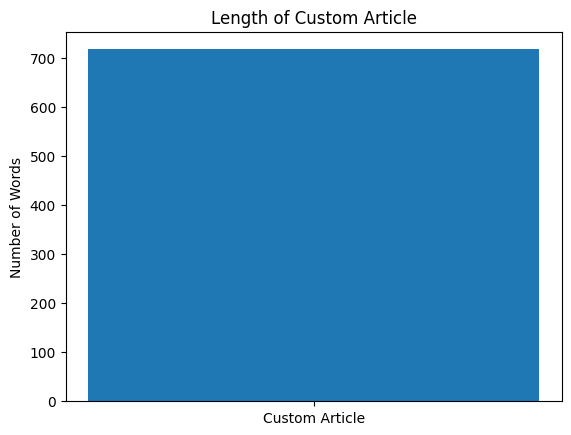

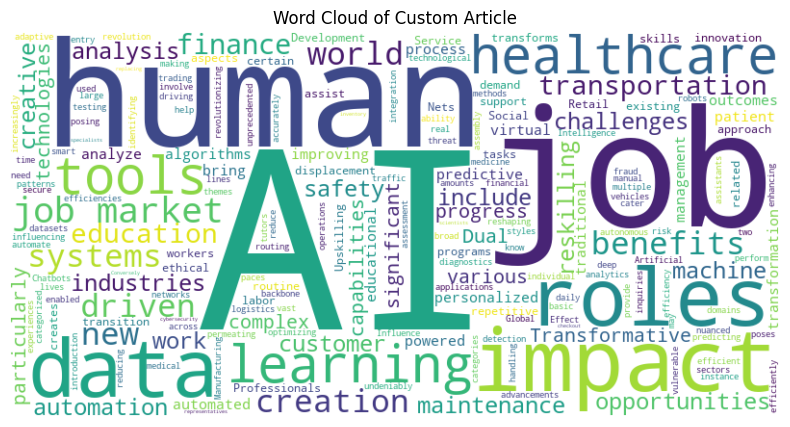

In [25]:
# Visualize Custom Article Data
# Plot the length of the custom article
custom_article_length = len(custom_article.split())
plt.bar(['Custom Article'], [custom_article_length])
plt.title('Length of Custom Article')
plt.ylabel('Number of Words')
plt.show()

# Generate a word cloud for the custom article
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(custom_article)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Custom Article')
plt.show()